In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import kpss, adfuller, ccf, ccovf
from statsmodels.iolib.smpickle import load_pickle
from collections import deque

In [3]:
horizon = pd.read_csv(".\\data\\horizon_multivariate_final.csv", encoding="utf-8")
# horizon = horizon[["Average Effective Clock", "GPU Effective Clock", "FPS"]]
horizon = horizon.iloc[:, [0,3,4]]
horizon.head()

,Average Effective Clock,GPU Effective Clock,FPS
0,2295.4,1950.3,113
1,2598.2,1941.3,146
2,2741.5,1948.2,147
3,2660.6,1937.2,150
4,2598.3,1936.8,152


In [3]:
horizon_train = horizon[:-10]
horizon_test = horizon[-10:]

In [4]:
# model_result31 = VARMAX(horizon_train, order=(3, 1)).fit()
# model_result31.save(f".\\weights\\VARMA 3\\VARMA_RE_result_31.pickle")

In [5]:
# model_result13 = VARMAX(horizon_train, order=(1, 3)).fit()
# model_result13.save(f".\\weights\\VARMA 3\\VARMA_RE_result_13.pickle")

In [6]:
# model_result41 = VARMAX(horizon_train, order=(4, 1)).fit()
# model_result41.save(f".\\weights\\VARMA 3\\VARMA_RE_result_41.pickle")

In [11]:
model_result41 = load_pickle(".\\weights\\VARMA 3\\VARMA_RE_result_41.pickle")
# model_result41.summary()

In [8]:
# model_result31 = load_pickle(".\\weights\\VARMA 3\\VARMA_RE_result_13.pickle")
# model_result31.summary()

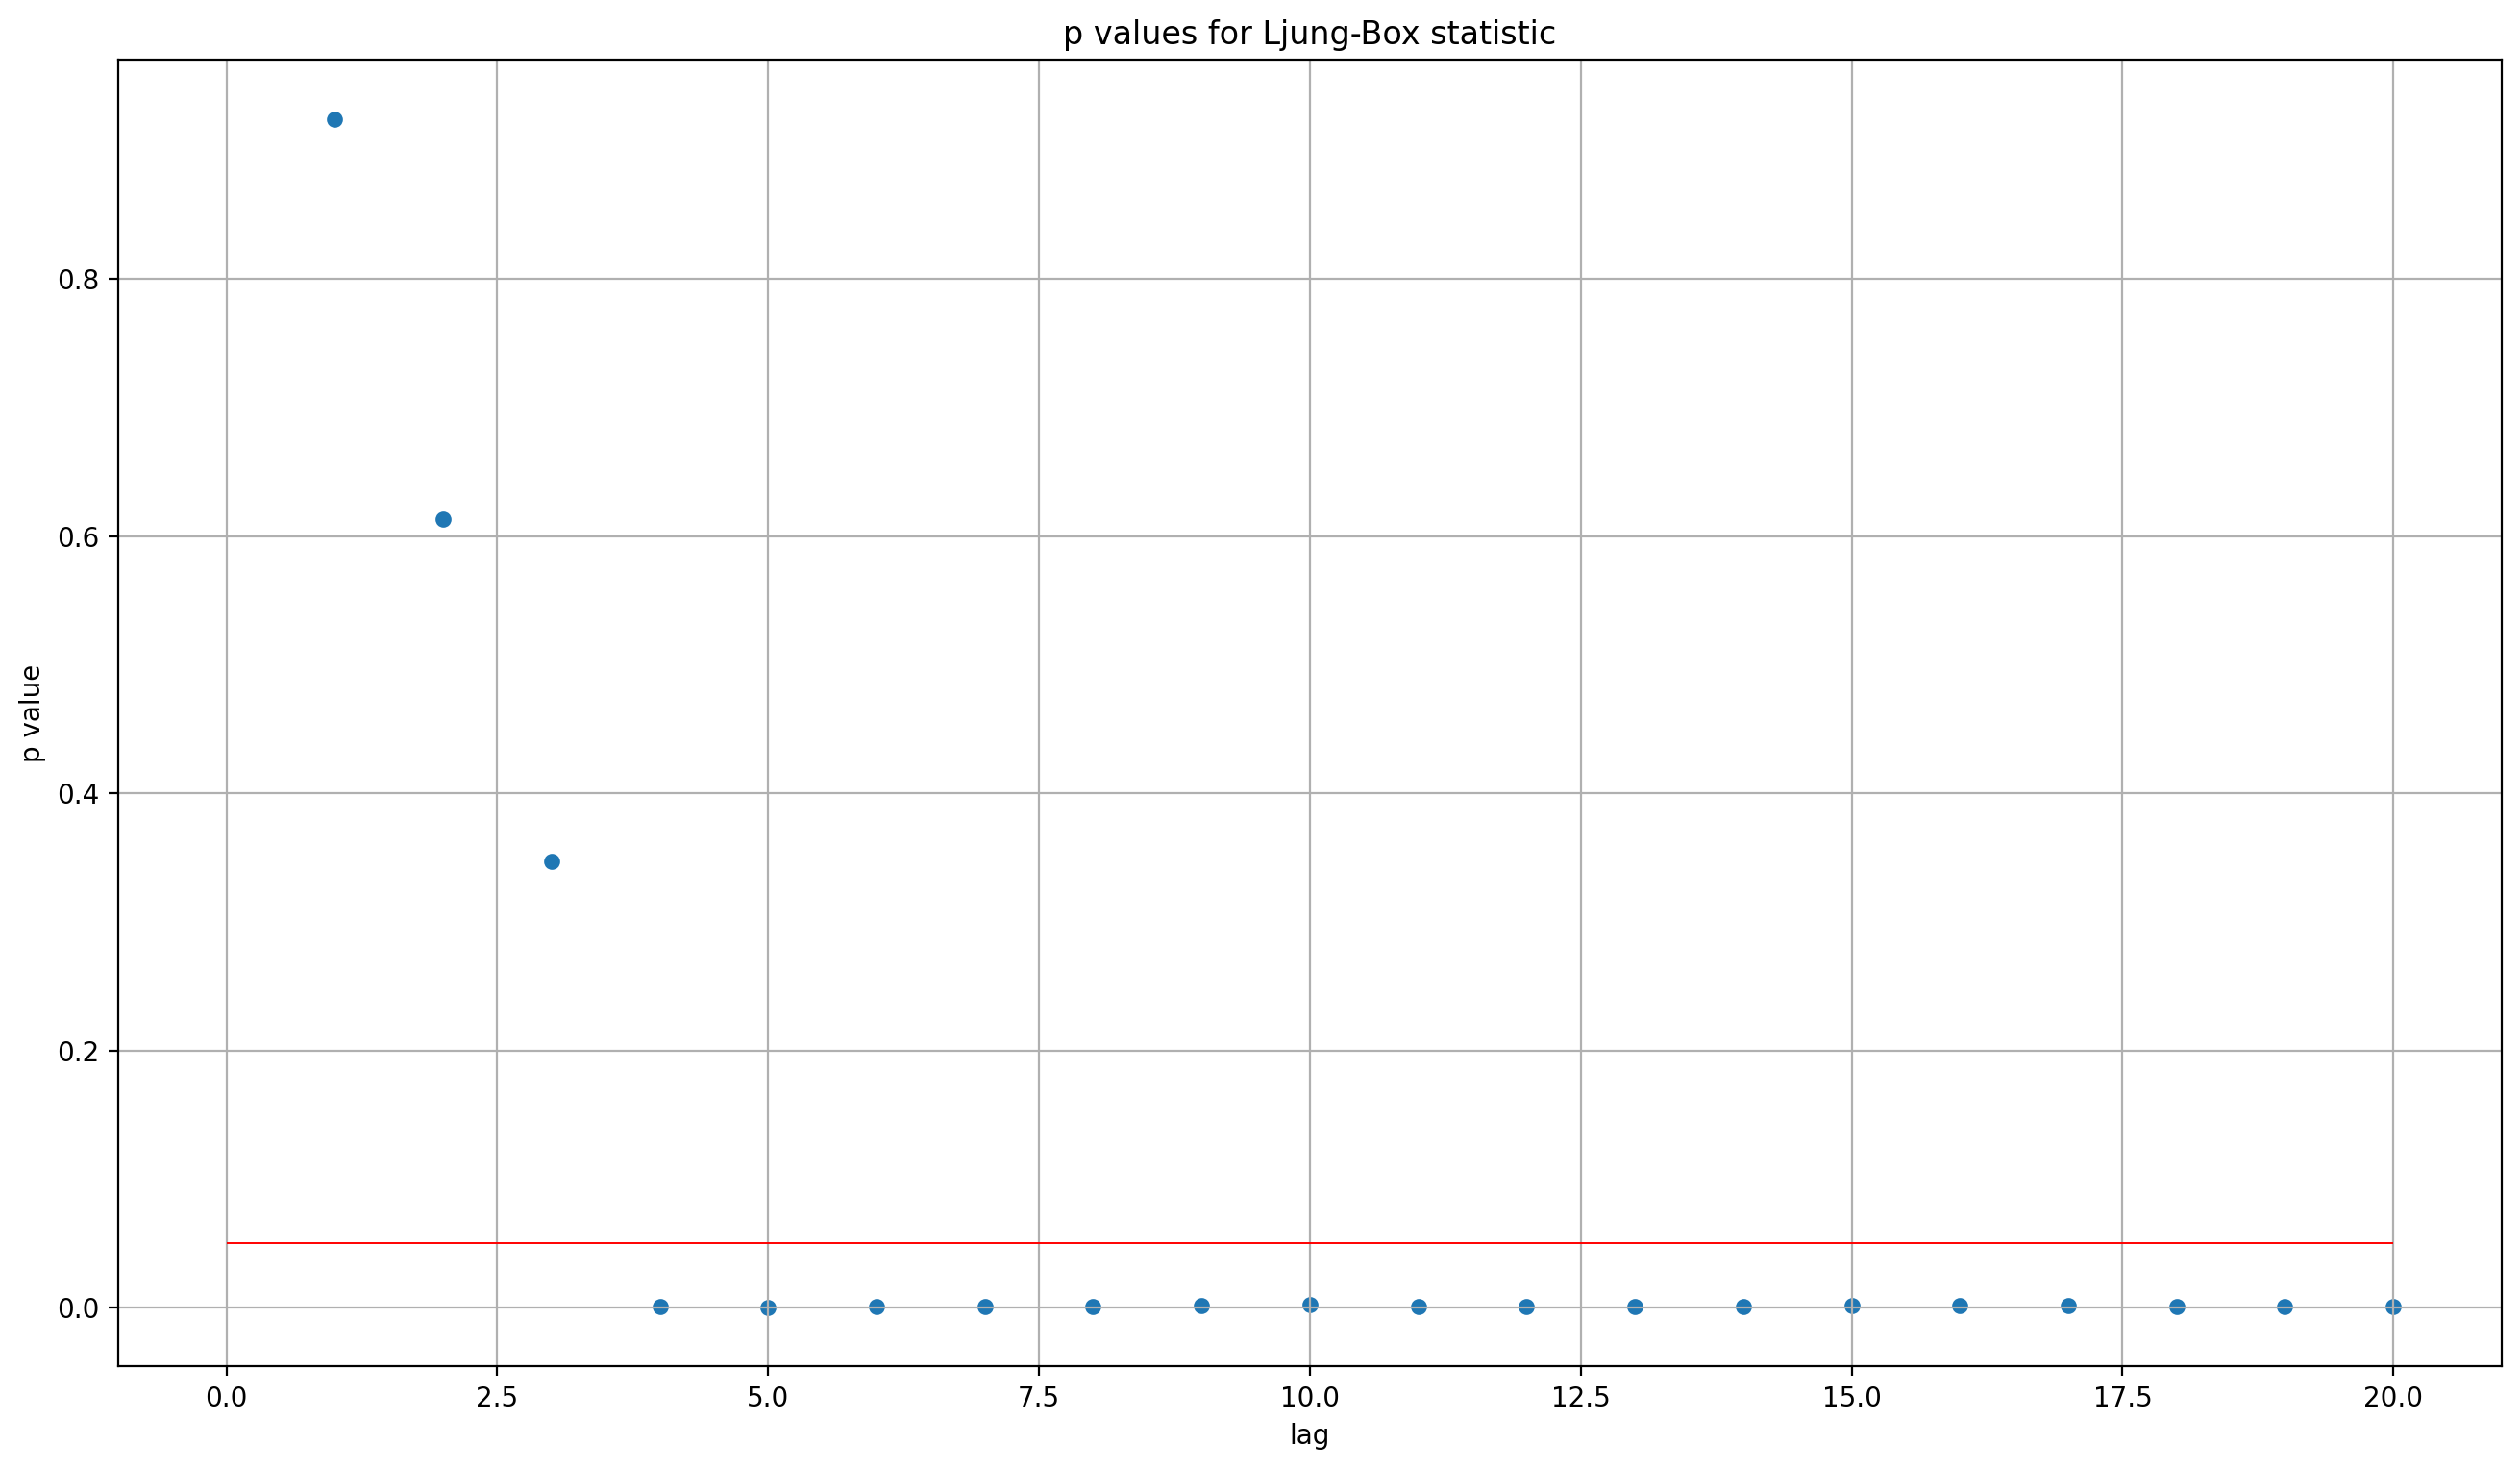

In [9]:
plt.figure(figsize=(16, 9), dpi=200)
plt.scatter(list(range(1,21)), model_result41.test_serial_correlation(method="ljungbox", lags=20)[2, 1, :], s=25)
plt.hlines(y=[0.05], xmin=0, xmax=20, colors="r", linewidths=0.7)
# plt.axis([0, 20, 0, 1])
plt.title("p values for Ljung-Box statistic")
plt.xlabel("lag")
plt.ylabel("p value")
plt.grid()
plt.show()

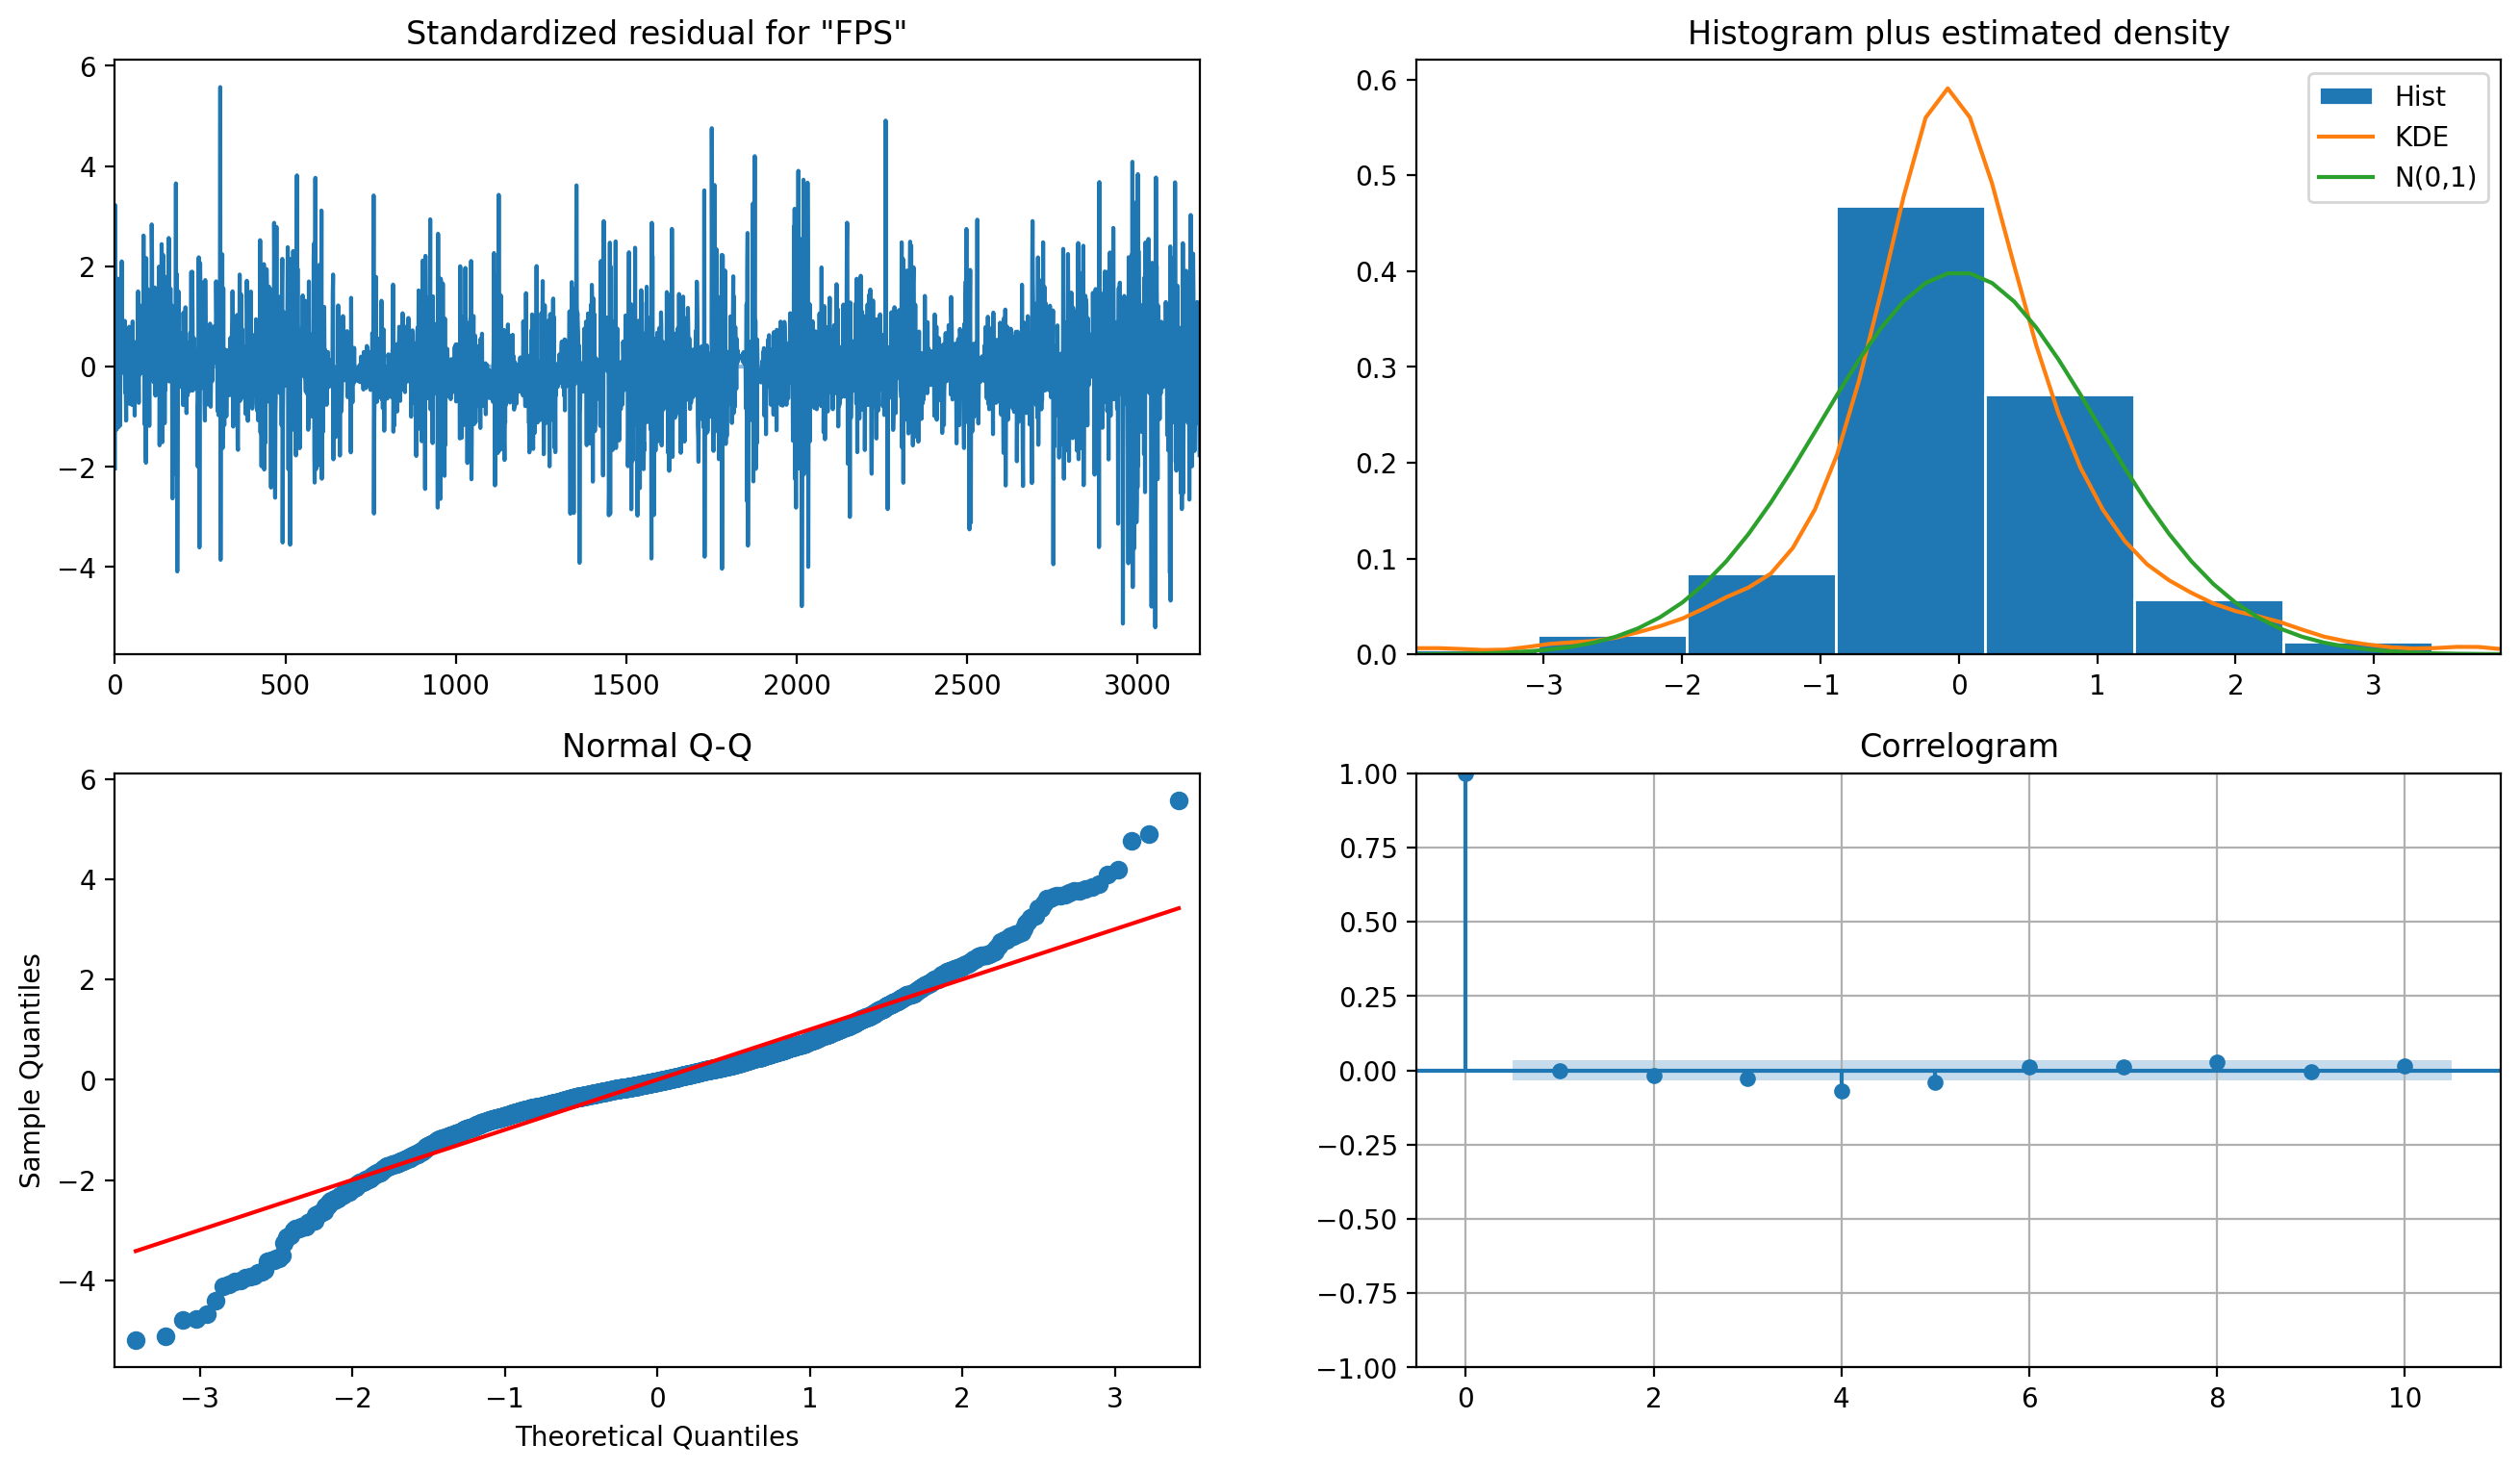

In [10]:
model_result41.plot_diagnostics(variable=2, fig=plt.figure(figsize=(16,9), dpi=200))
plt.grid()
plt.show()